<a href="https://colab.research.google.com/github/Clement-Okolo/ImageProcessing/blob/main/Directional%20Derivatives%20Using%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clement Tochukwu Okolo (C00481669)

**Write Python code using TensorFlow 2 to implement directional derivatives in x- and y-directions of a color image.**

# Load Libraries

In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.ndimage import filters

# Read Image

In [ ]:
# read image and convert to numpy array
rbg_image = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/flower.jpg'))

# Store it as an element in another numpy array
rbg_imageset = np.array([rbg_image], dtype = np.float32)

# imageset is a 4D tensor
rbg_imageset.shape

(1, 4457, 3456, 3)

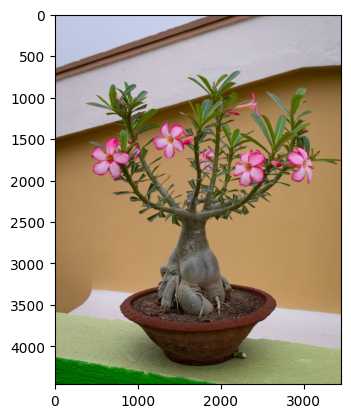

In [ ]:
plt.imshow(rbg_image)

In [ ]:
batch_size, height, width, channels = rbg_imageset.shape
print("The shape of our input image:",  batch_size, height, width, channels)

The shape of our input image: 1 4457 3456 3


We have a single input image, with height 4457, width 3456 and 3 channels. The 3 channels indicates that it is a colored image

# Set-Up Filters

**If height=13, width=13, filter=2**

In [ ]:
# 13 rows and 13 column, Two filters, and change to data type float32
filters=np.zeros((13, 13, channels, 2), dtype =np.float32)

# Set the 7th row to 1 for x-directional derivative
filters[6,:,:,0]=1

# set the 7th column for y-directional derivative
filters[:,6,:,1]=1

# Use TensorFlow 2 to implement directional derivatives

In [ ]:
# in stride, N and C dimension are kept 1 and this is default value
output = tf.nn.conv2d(rbg_imageset, filters, strides=[1,2,2,1], padding="SAME")

# convert to numpy array
finaloutput = output.numpy()

print("The shape of the output image: ", finaloutput.shape)

The shape of the output image:  (1, 2229, 1728, 2)


**2D value of the output images**

In [ ]:
finaloutput_0 = output[0,:,:,0]
finaloutput_1 = output[0,:,:,1]

print("The shape of the output image_0: ", finaloutput_0.shape)
print("The shape of the output image_1: ", finaloutput_1.shape)

The shape of the output image_0:  (2229, 1728)
The shape of the output image_1:  (2229, 1728)


Both output images have the same dimension

# Plot output images

In [ ]:
plt.gray() # plot gray image

plt.imsave("flower0.jpg", finaloutput_0) # save output0 as flower0.jpg
plt.imsave("flower1.jpg", finaloutput_1) # save output1 as flower1.jpg

<Figure size 640x480 with 0 Axes>

In [ ]:
imageflower0 = finaloutput_0.numpy()
imageflower1 = finaloutput_1.numpy()

### Output image after filtering in the x-direction

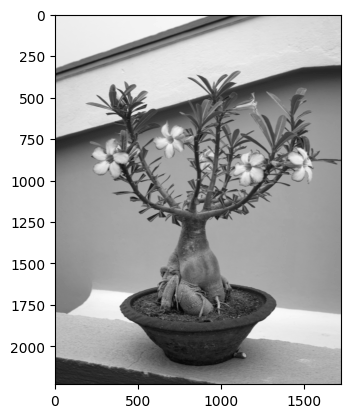

In [ ]:
plt.imshow(imageflower0) # plot output image after filtering in the x-direction

### Output image after filtering in the y-direction

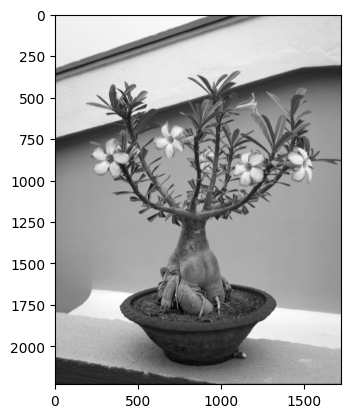

In [ ]:
plt.imshow(imageflower1) # plot output image after filtering in the y-direction

# Scale images within 8 bit in X and Y directions

In [ ]:
imageflower0 = imageflower0.astype('int8') # converting float32 to 8-bit integer for first filter
imageflower1 = imageflower1.astype('int8') # converting float32 to 8-bit integer for 2nd filter

### Output image after scaling within 8 bits in the x-direction

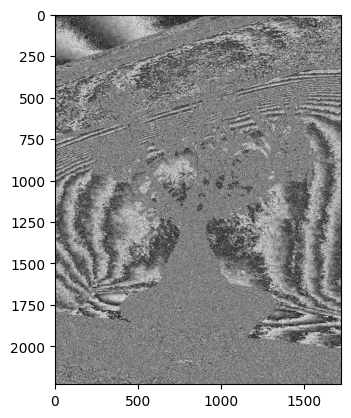

In [ ]:
plt.imshow(imageflower0) # plot output image after scaling within 8 bits in the x-direction

### Output image after scaling within 8 bits in the y-direction

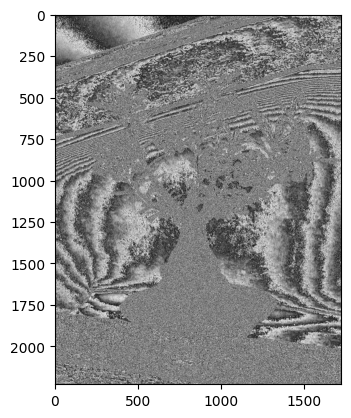

In [ ]:
plt.imshow(imageflower1) # plot output image after scaling within 8 bits in the y-direction